## Principal Component Analysis 

In [1]:
import pandas as pd

# Load the data
red_wine_df = pd.read_csv('wine+quality/winequality-red.csv')
white_wine_df = pd.read_csv('wine+quality/winequality-white.csv')

wine_df = pd.concat([red_wine_df, white_wine_df])

# Split the data by commas and assign it to columns
wine_df = wine_df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)
wine_df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [2]:
wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [3]:
label = wine_df['quality']
wine_df = wine_df.drop('quality', axis=1)

### Standardize the values of each column, Plot Covariance Matrix and distributions to visualize 

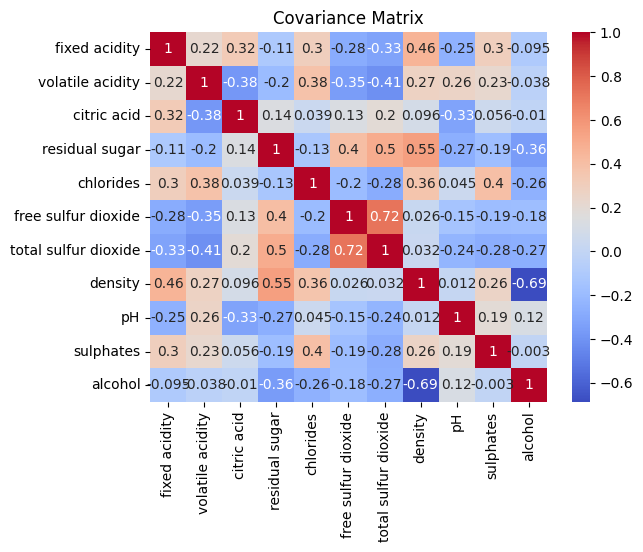

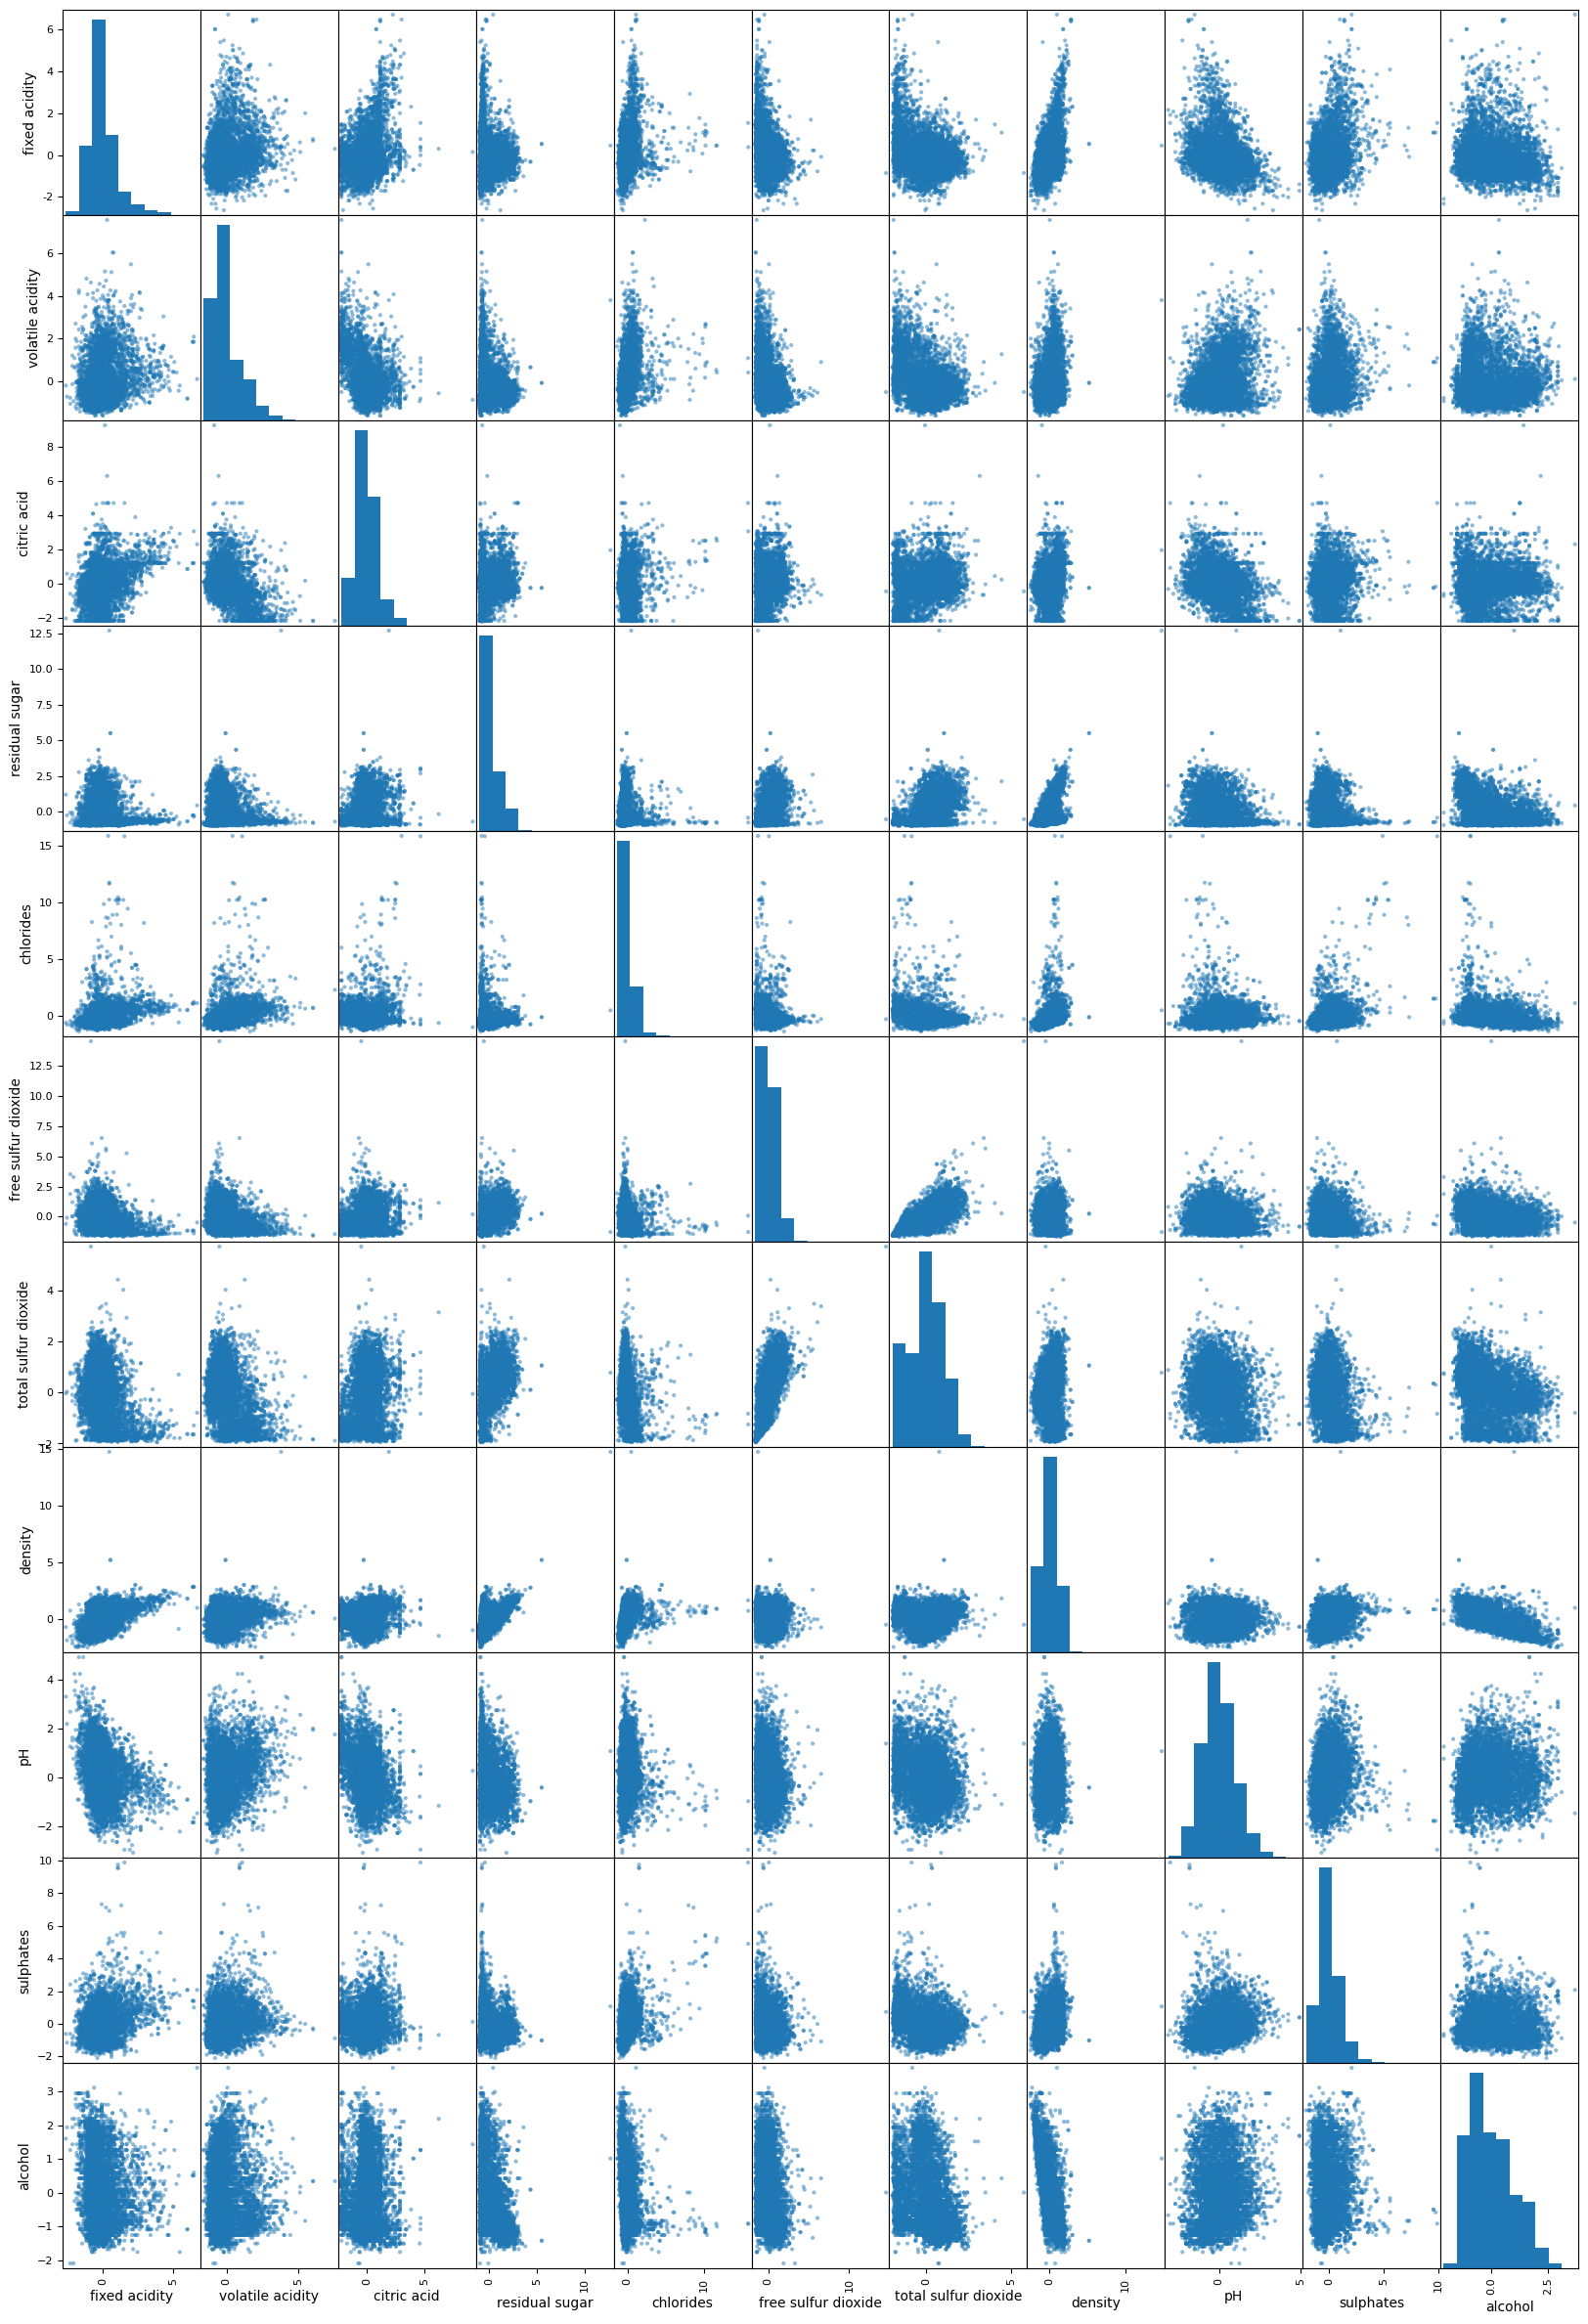

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Standardizing the data    
scaler = StandardScaler()

standardized_data = scaler.fit_transform(wine_df)
standardized_df = pd.DataFrame(standardized_data, columns=wine_df.columns)
covariance_matrix = standardized_df.cov()
# covariance_matrix

# Plotting the covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

# Plotting the scatter matrix
# print(standardized_df)
pd.plotting.scatter_matrix(standardized_df, figsize=(20, 30))
plt.show()


### Perform PCA (First 10 Principal Components are found)

Number of PCA components: 1
Variance explained by each PCA component: [0.2754426]
Total Variance Explained: [0.2754426]


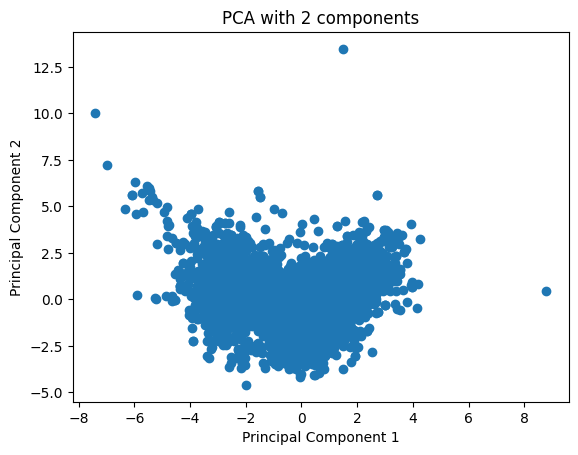

Number of PCA components: 2
Variance explained by each PCA component: [0.2754426  0.22671146]
Total Variance Explained: [0.2754426  0.50215406]
Number of PCA components: 3
Variance explained by each PCA component: [0.2754426  0.22671146 0.14148609]
Total Variance Explained: [0.2754426  0.50215406 0.64364015]
Number of PCA components: 4
Variance explained by each PCA component: [0.2754426  0.22671146 0.14148609 0.08823201]
Total Variance Explained: [0.2754426  0.50215406 0.64364015 0.73187216]
Number of PCA components: 5
Variance explained by each PCA component: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317]
Total Variance Explained: [0.2754426  0.50215406 0.64364015 0.73187216 0.79731533]
Number of PCA components: 6
Variance explained by each PCA component: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016]
Total Variance Explained: [0.2754426  0.50215406 0.64364015 0.73187216 0.79731533 0.85252548]
Number of PCA components: 7
Variance explained by each PCA c

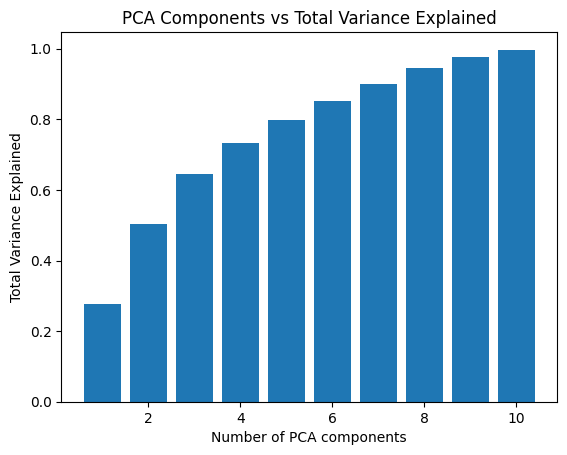

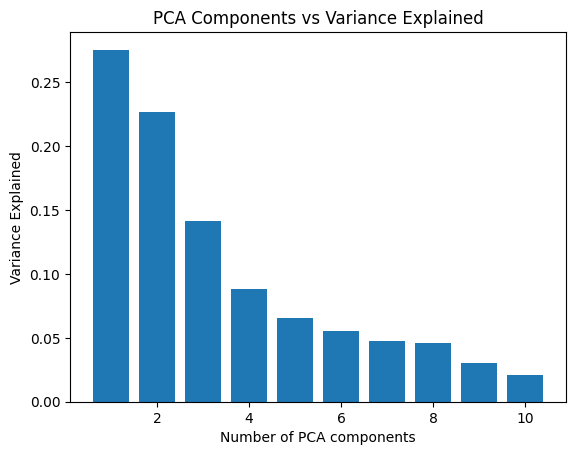

In [5]:
from sklearn.decomposition import PCA
import numpy as np

for i in range (1, 11):
    pca = PCA(n_components=i)
    pca.fit(standardized_data)
    principal_components = pca.transform(standardized_data)

    if i ==2:
        plt.scatter(principal_components[:, 0], principal_components[:, 1])
        plt.title('PCA with 2 components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
    print("Number of PCA components:", i)
    var_explained = pca.explained_variance_ratio_
    print("Variance explained by each PCA component:", var_explained)
    print("Total Variance Explained:", np.cumsum(var_explained))

    if i == 10:
        PCA_Number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        plt.bar(PCA_Number, np.cumsum(var_explained))
        plt.xlabel('Number of PCA components')
        plt.ylabel('Total Variance Explained')
        plt.title('PCA Components vs Total Variance Explained')
        plt.show()

        plt.bar(PCA_Number, var_explained)
        plt.xlabel('Number of PCA components')
        plt.ylabel('Variance Explained')
        plt.title('PCA Components vs Variance Explained')
        plt.show()